# **Exploratory analysis of the data**

## Extra Preprocessing

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import seaborn as sns

In [25]:
def trunc_length(ds, nb_hours):
#function that truncates the data to only consider the first nb_hours hours
    df = ds.loc[ds.index <=  nb_hours]
    return df

def create_batchs(ds):
    batchs = []
    ids = ds.stay_id.unique()
    for i in ids:
        batchs.append(ds.loc[ds['stay_id'] == i])
    return batchs

def remove_missing(df, var, threshold):
#remove from batch the entries where a too large proportion of the variables var are missing 
    res = df
    
    
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                    'percent_missing': percent_missing})
    for vital in var: 
        criterion = missing_value_df.loc[missing_value_df.column_name == vital].percent_missing >= threshold 
        if criterion:
            print('entry removed')
            print(missing_value_df.loc[missing_value_df.column_name == vital].percent_missing)
            df.drop([vital], axis = 1)
        else:
            res.append(batch[i])
    return res

def get_column_name(df):
    listn = [col for col in df.columns]
    return listn


## Loading the data

In [39]:
nb_hours = 48
list_vit = ['HR', 'SpO2', 'ABPm', 'CPP', 'Temperature (C)']
list_vit_clean = ['Heart Rate (bpm)', 'Oxygen Saturation (%)', 'MAP (mmHg)', 'CPP (mmHg)', 'ICP (mmHg)']


df = pd.read_csv('preprocessed_mimic4_hour.csv', delimiter=',', index_col = 'hour_from_intime')
df = df.drop(columns = ['icu_intime'])
df = trunc_length(df, 48)
df_batch = create_batchs(df)
print(len(df_batch))

pd.set_option('display.max_rows', 50)
df_final = df.pivot_table(index = ['stay_id', 'hour_from_intime'], columns = 'feature_name', values = 'round')


614


In [27]:
df_final = df_final.reset_index(level=['stay_id'])
bch = create_batchs(df_final)


In [58]:
vitals = get_column_name(df_final)
vitals.pop(0)


'ABI Ankle BP L '

In [59]:
demographic = pd.read_csv('demographics_mimic4.csv', delimiter=',')
print(vitals)



['ABI Ankle BP R', 'ABI Brachial BP L', 'ABI Brachial BP R ', 'ABPd', 'ABPm', 'ABPs', 'ALT', 'APACHEIII', 'ART BP Diastolic', 'ART BP Mean', 'ART BP Systolic', 'ART Lumen Volume', 'AST', 'ATC %', 'Absolute Neutrophil Count', 'Access Pressure', 'Activity HR - Aerobic Capacity', 'Activity RR - Aerobic Activity Response', 'Activity RR - Aerobic Capacity', 'Alkaline Phosphate', 'Ammonia', 'Amylase', 'Anion gap', 'Apache IV A-aDO2', 'ApacheIV_LOS', 'Apnea Interval', 'Arctic Sun Water Temp', 'Arctic Sun/Alsius Set Temp', 'Arctic Sun/Alsius Temp #1 C', 'Arctic Sun/Alsius Temp #2 C', 'Arterial Base Excess', 'BIS Index Range', 'BUN', 'Baseline Current/mA', 'BiPap EPAP', 'BiPap IPAP', 'BiPap O2 Flow', 'Bladder Pressure', 'Blood Flow (ml/min)', 'Blood Temp CCO (C)', 'CFI (PiCCO)', 'CI (PiCCO)', 'CK (CPK)', 'CK-MB fraction (%)', 'CO (Arterial)', 'CO (CCO)', 'CO (PiCCO)', 'CO (thermodilution)', 'CO / CI Change', 'CPP', 'CVP', 'Calcium non-ionized', 'Cardiac Index (CI NICOM)', 'Cardiac Output (CO NI

In [16]:
test = pd.concat(bch)
test.replace(0, np.nan, inplace=True)
print(test.loc['total'])

feature_name           stay_id  ABI Ankle BP L   ABI Ankle BP R  \
hour_from_intime                                                  
total             1.440302e+09              NaN             NaN   
total             1.501690e+09              NaN             NaN   
total             1.502950e+09              NaN             NaN   
total             1.503035e+09              NaN             NaN   
total             1.411130e+09              NaN             NaN   
...                        ...              ...             ...   
total             1.957308e+09              NaN             NaN   
total             1.998465e+09              NaN             NaN   
total             1.876316e+09              NaN             NaN   
total             1.998967e+09              NaN             NaN   
total             1.878432e+09              NaN             NaN   

feature_name      ABI Brachial BP L  ABI Brachial BP R          ABPd  \
hour_from_intime                                        

## Analysis of missing data

In [31]:
# /!\ code à clean 
import plotly.graph_objects as go

miss_hr = []
miss_spO2 = []
miss_map = []
miss_icp = []
miss_cpp = []
for i in range(len(bch)):
        percent_missing = bch[i].isnull().sum() * 100 / len(bch[i])
        missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
        miss_hr.append(percent_missing['HR'])
        miss_spO2.append(percent_missing['SpO2'])
        miss_map.append(percent_missing['ABPm'])
        miss_cpp.append(percent_missing['CPP'])
        miss_icp.append(percent_missing['ICP'])

fig = go.Figure()
fig.update_layout(xaxis_title='Vitals missing percentage (N = 614)', yaxis_title = 'Percentage %')
fig.add_trace(go.Box(y=miss_hr, boxpoints='all', name = 'Heart rate'))
fig.add_trace(go.Box(y=miss_spO2, boxpoints='all', name = 'spO2'))
fig.add_trace(go.Box(y=miss_map, boxpoints='all', name = 'MAP'))
fig.add_trace(go.Box(y=miss_cpp, boxpoints='all', name = 'CPP'))
fig.add_trace(go.Box(y=miss_icp, boxpoints='all', name = 'ICP'))


fig.show()

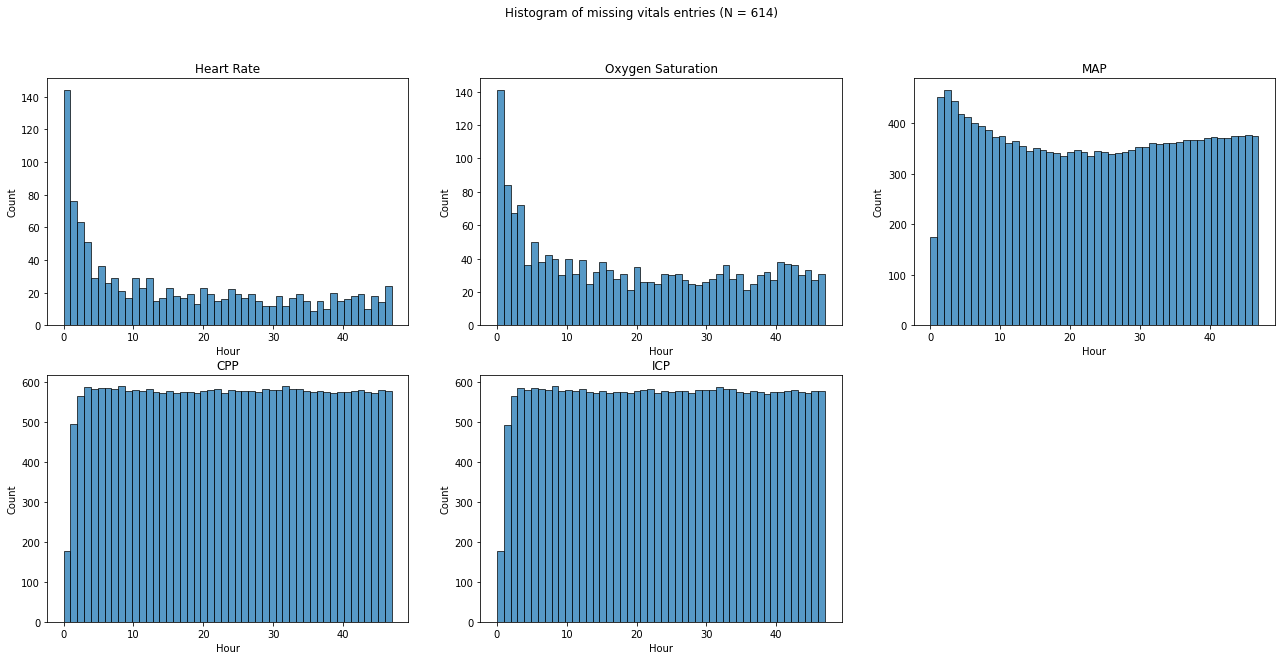

In [32]:
batchs = bch 
df = pd.concat(batchs)
missing_hist = []
for vit in list_vit:
    missing_hist.append([df.loc[i][vit].isnull().sum() for i in range(nb_hours)])

fig, axes = plt.subplots(2,3, figsize=(22, 10))
axe = axes.ravel()
axe[5].set_visible(False)
fig.suptitle('Histogram of missing vitals entries (N = 614)')
j = 0
for i in range(len(list_vit)):
    sns.histplot(ax = axe[i], x = range(nb_hours), weights =  missing_hist[i], bins = nb_hours)
    axe[i].set_title(list_vit_clean[i])
    axe[i].set_xlabel('Hour')



In [ ]:
#Removing missing data 
batchs = remove_missing(bch, ['heart_rate', 'oxygen_saturation', 'map'], threshold = 20)
print(len(batchs))

## Time-series plots - patterns

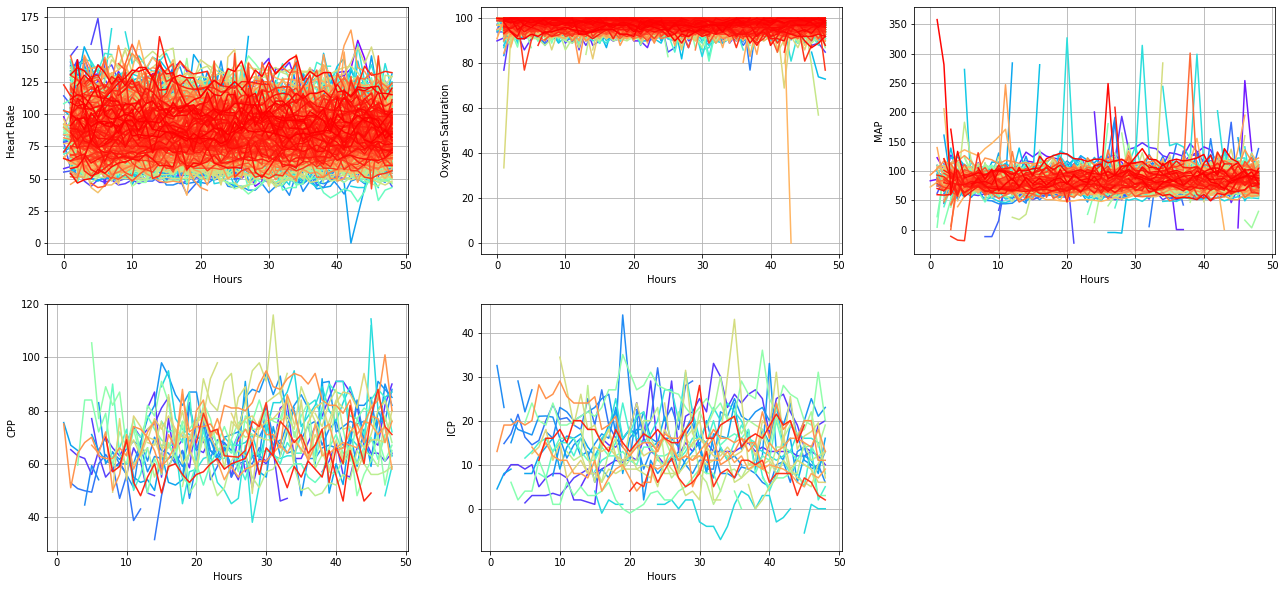

In [33]:
#Simple plots of the variables
fig, axes = plt.subplots(2,3, figsize=(22, 10))
axe = axes.ravel()
axe[5].set_visible(False)
for i in range(len(list_vit)):
    color = iter(cm.rainbow(np.linspace(0, 1, len(batchs))))
    for patient in range(len(batchs)):
        c = next(color)
        batchs[patient][list_vit[i]].plot(ax = axe[i], xlabel = 'Hours', color = c, ylabel = list_vit_clean[i])
        axe[i].grid()


#faire une fonction threshold missing 
#faire une fonction pour chaque patient uqi peut être appliquée à chaque patient 

In [ ]:
import itertools

df = pd.concat(batchs)
agg_mean = (df).groupby(df.index).agg({'HR': np.mean, 'SpO2': np.mean, 'ABPm': np.mean, 'CPP': np.mean, 'ICP': np.mean})
agg_std = (df).groupby(df.index).agg({'HR': np.mean, 'SpO2': np.mean, 'ABPm': np.mean, 'CPP': np.mean, 'ICP': np.mean})
color = color = iter(cm.rainbow(np.linspace(0, 1, len(list_vit))))

fig, ax = plt.subplots(figsize=(9, 9))
fig.suptitle('Vitals analysis (N = 614)')
for i in range(len(list_vit)):
    c = next(color)
    ax.plot(range(nb_hours + 1), agg_mean[list_vit[i]], alpha=1, color=c, label=list_vit_clean[i], linewidth = 3.0)
    ax.fill_between(range(nb_hours + 1), agg_mean[list_vit[i]] - agg_std[list_vit[i]], agg_mean[list_vit[i]] + agg_std[list_vit[i]], color=c  , alpha=0.2)
    plt.grid()

ax.legend(loc='best')
ax.set_xlabel("Hours")

## Vitals univariate analysis

In [40]:
fig = go.Figure()
fig.update_layout(xaxis_title='Vitals values analysis (N = 614)', yaxis_title = "Value")
for i in range(len(list_vit)):
    fig.add_trace(go.Box(y=pd.concat(batchs)[list_vit[i]], boxpoints='all', name = list_vit_clean[i]))

fig.show()


## Vitals bivariate analysis

In [ ]:
batchs = bch
f = plt.figure(figsize=(20, 12))
gs = f.add_gridspec(3, 3)
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0]) 
    sns.regplot(x=list_vit[0], y=list_vit[1], data=pd.concat(batchs))
    ax = f.add_subplot(gs[0, 1]) 
    sns.regplot(x=list_vit[2], y=list_vit[1], data=pd.concat(batchs), color = 'red')
    ax = f.add_subplot(gs[0, 2]) 
    sns.regplot(x=list_vit[0], y=list_vit[2], data=pd.concat(batchs), color = 'cyan')
    ax = f.add_subplot(gs[1, 0]) 
    sns.regplot(x=list_vit[0], y=list_vit[3], data=pd.concat(batchs), color = 'purple')
    ax = f.add_subplot(gs[1, 1]) 
    sns.regplot(x=list_vit[0], y=list_vit[4], data=pd.concat(batchs), color = 'brown')
    ax = f.add_subplot(gs[1, 2]) 
    sns.regplot(x=list_vit[2], y=list_vit[3], data=pd.concat(batchs), color = 'green')
    ax = f.add_subplot(gs[2, 0]) 

    sns.regplot(x=list_vit[2], y=list_vit[4], data=pd.concat(batchs), color = 'yellow')
    ax = f.add_subplot(gs[2, 1]) 

    sns.regplot(x=list_vit[3], y=list_vit[4], data=pd.concat(batchs), color = 'black')





    

## Data imputation

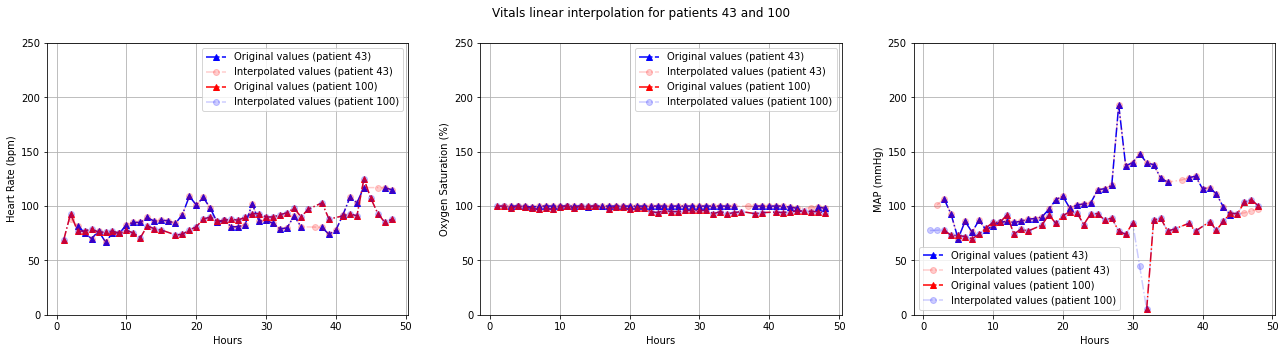

In [57]:
#plot for one patient 
data = pd.concat(batchs)
interpo = data.interpolate(limit = 100)
interpo = create_batchs(interpo)
patient = 43
patient3 = 100
patient2 = 100

fig, axes = plt.subplots(1,3, figsize=(22, 5))
axe = axes.ravel()
color = iter(cm.rainbow(np.linspace(0, 1, len(batchs))))
fig.suptitle('Vitals linear interpolation for patients {pat1} and {pat2}'.format(pat1=patient, pat2 = patient2))
for i in range(len(list_vit) - 2):
    batchs[patient][list_vit[i]].plot(ax = axe[i], xlabel = 'Hours',marker='^', linestyle='-.', alpha = 1, color = 'blue', ylabel = list_vit_clean[i], legend = 'patient 43')
    interpo[patient][list_vit[i]].plot(x = range(nb_hours),marker='o', ax = axe[i], alpha = 0.2, xlabel = 'Hours', linestyle='-.', color = 'red', ylabel = list_vit_clean[i], ylim = [0,250])
    batchs[patient2][list_vit[i]].plot(ax = axe[i], xlabel = 'Hours',marker='^', linestyle='-.', alpha = 1, color = 'red', ylabel = list_vit_clean[i])
    interpo[patient2][list_vit[i]].plot(x = range(nb_hours),marker='o', ax = axe[i], alpha = 0.2, xlabel = 'Hours', linestyle='-.', color = 'blue', ylabel = list_vit_clean[i], ylim = [0,250])
    axe[i].grid()
    axe[i].legend(['Original values (patient 43)', 'Interpolated values (patient 43)', 'Original values (patient 100)', 'Interpolated values (patient 100)'])

## Analysis of remaining features - Features selection

In [23]:
percent_missing = test.loc['total'].isnull().sum() * 100 / len(test.loc['total'])
missing_value_df = pd.DataFrame({'column_name': test.loc['total'].columns,
                                    'percent_missing': percent_missing})

print(missing_value_df['percent_missing'].drop(['stay_id']))

fig = go.Figure()
fig.update_layout(xaxis_title='Vitals missing rate analysis (N = 295) - 48-hours data aggregation',  yaxis_title="% of missing vitals entries")
fig.add_trace(go.Box(y=missing_value_df['percent_missing'], boxpoints='all', name = '', marker_color = 'MediumPurple'))
fig.show()

#df_final_missing = remove_missing(df_final, vitals, 80)

feature_name
ABI Ankle BP L        99.837134
ABI Ankle BP R        99.837134
ABI Brachial BP L     99.837134
ABI Brachial BP R     99.837134
ABPd                  47.557003
                        ...    
Ventilator Tank #2    41.042345
Volume In (PD)        99.837134
Volume Out (PD)       99.674267
Vti High              36.970684
WBC                    0.162866
Name: percent_missing, Length: 273, dtype: float64


## Extraction of labels

In [ ]:
label = []
for patient in interpo:
    print(patient)
    label.append([patient.iloc[25][vit] for vit in list_vit])
    patient = patient.drop(25)
    
    print(label)